In [12]:
import pymongo
import numpy as np
import pandas as pd
import calendar, datetime
import matplotlib.pyplot as plt
from pymongo import MongoClient


# Convert a unix time u to a datetime object d, and vice versa
def dt(u): return datetime.datetime.utcfromtimestamp(u)
def ut(d): return calendar.timegm(d.timetuple())

#CONNECT TO MONGO 
client = MongoClient("129.26.78.40:27017")
db = client['BitCoin']

In [29]:
%matplotlib inline 

In [13]:
[a for a in db.collection_names() if "second" in a]

[u'number_of_edges_per_second_2017']

In [14]:
collection = db['number_of_edges_per_second_2017']
collection_keys = collection.find_one().keys()
collection_keys

[u'week', u'hour', u'txs', u'number', u'month', u'_id', u'minutes', u'day']

In [15]:
collection.find_one({"day":start_day})

{u'_id': ObjectId('59bff47348ec0fd6e85070f8'),
 u'day': 3,
 u'hour': 17,
 u'minutes': 0,
 u'month': 1,
 u'number': 3,
 u'txs': [1483462806, 1483462855, 1483462817],
 u'week': 1}

In [16]:
a = db['number_of_edges_per_second_2017'].find().sort([("day",-1)])
last_day  = a.next()["day"]

a = db['number_of_edges_per_second_2017'].find().sort([("day",1)])
start_day = a.next()["day"]

In [49]:
a = db['number_of_edges_per_second_2017'].find().sort([("week",-1)])
last_week  = a.next()["week"]

a = db['number_of_edges_per_second_2017'].find().sort([("week",1)])
start_week = a.next()["week"]

In [60]:
a = db['number_of_edges_per_second_2017'].find().sort([("minutes",-1)])
last_minutes  = a.next()["minutes"]

a = db['number_of_edges_per_second_2017'].find().sort([("minutes",1)])
start_minutes = a.next()["minutes"]

In [62]:
last_minutes

59

In [18]:
dt(1483462806)

datetime.datetime(2017, 1, 3, 17, 0, 6)

In [19]:
final_date = date0 + datetime.timedelta(days=last_day)
final_date

datetime.datetime(2017, 8, 20, 0, 0)

# PER DAYS

In [132]:
pandas_date_range = pd.date_range(date0,datef,freq="D")
datetime_range = pandas_date_range.to_pydatetime()
DAY_TIME_SERIES = {d:0 for d in datetime_range}

In [133]:
for date_ in datetime_range:
    year_day = (date_-day_zero).days
    print year_day
    for a in collection.find({"day":year_day}):
        DAY_TIME_SERIES[date_] += a['number']

3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213


In [134]:
daily_time_series = pd.Series(DAY_TIME_SERIES)
daily_data_frame = pd.DataFrame(daily_time_series)

In [135]:
daily_data_frame.describe()

,0
count,211.000000
mean,79555.236967
std,5638.053074
min,8649.000000
25%,78451.500000
50%,80502.000000
75%,81791.500000
max,84861.000000


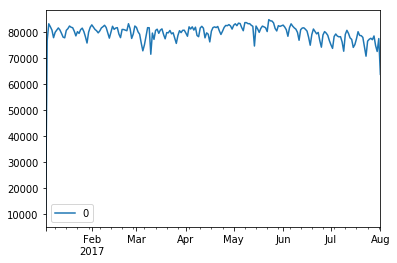

In [138]:
daily_data_frame.plot()

# PER HOURS

In [20]:
number_of_minutes = db['number_of_edges_per_second_2017'].find().count()
number_of_minutes
#a = db['number_of_edges_per_second_2017'].find().sort([("month",-1)]).limit(1)

324857

In [21]:
day_zero = datetime.datetime(2016,12,31)
date0 = datetime.datetime(2017,1,3)
datef = datetime.datetime(2017,8,1)

In [22]:
date0 - day_zero

datetime.timedelta(3)

In [35]:
pandas_date_range = pd.date_range(date0,datef,freq="H")
datetime_range = pandas_date_range.to_pydatetime()
HOUR_TIME_SERIES = {d:0 for d in datetime_range}

In [94]:
#for date_ in datetime_range:
#    year_day = (date_-day_zero).days
#    print year_day
#    print date_.hour
#    for a in collection.find({"day":year_day,"hour":date_.hour}):
#        HOUR_TIME_SERIES[date_] += a['number']

In [47]:
hourly_time_series = pd.Series(HOUR_TIME_SERIES)
hourly_data_frame = pd.DataFrame(hourly_time_series)

In [48]:
hourly_data_frame.describe()

,0
count,5041.000000
mean,3317.850427
std,285.441766
min,0.000000
25%,3250.000000
50%,3367.000000
75%,3454.000000
max,3591.000000


# PER MINUTES

In [87]:
pandas_date_range = pd.date_range(date0,datef,freq="60S")
datetime_range = pandas_date_range.to_pydatetime()
MINUTES_TIME_SERIES = {d:0 for d in datetime_range}

In [93]:
#for date_ in datetime_range:
#    year_day = (date_-day_zero).days
#    print year_day
#    for a in collection.find({"day":year_day,"minutes":date_.minute}):
#        MINUTES_TIME_SERIES[date_] += a['number']

In [89]:
minutes_time_series = pd.Series(MINUTES_TIME_SERIES)
minutes_data_frame = pd.DataFrame(minutes_time_series)

In [90]:
minutes_data_frame.describe()

,0
count,302401.000000
mean,1327.172003
std,93.594872
min,98.000000
25%,1307.000000
50%,1341.000000
75%,1366.000000
max,1425.000000


In [91]:
sum(minutes_time_series.values != 0)

302401

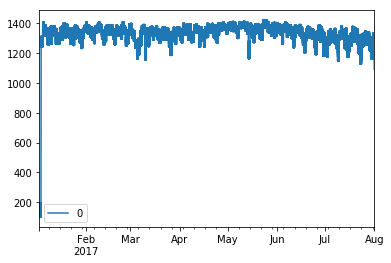

In [92]:
minutes_data_frame.plot()

# WEEK

In [121]:
weeks = range(34)
WEEK_TIME_SERIES = {w:0 for w in weeks}

In [122]:
for week in weeks:
    print week
    for a in collection.find({"week":week}):
        WEEK_TIME_SERIES[week] += a['number']

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33


In [123]:
week_time_series = pd.Series(WEEK_TIME_SERIES)
week_data_frame = pd.DataFrame(week_time_series)

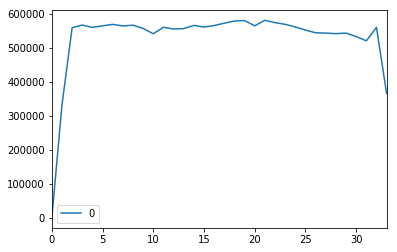

In [124]:
week_data_frame.plot()

In [140]:
data_dir = "/home/cesar/Desktop/Doctorado/Projects/Networks/BitCoin/Transactions/"
minutes_data_frame.to_csv("/home/cesar/Desktop/Doctorado/Projects/Networks/BitCoin/Transactions/minutes_edges_2017.csv")
hourly_data_frame.to_csv("/home/cesar/Desktop/Doctorado/Projects/Networks/BitCoin/Transactions/hours_edges_2017.csv")
daily_data_frame.to_csv("/home/cesar/Desktop/Doctorado/Projects/Networks/BitCoin/Transactions/day_edges_2017.csv")
week_data_frame.to_csv("/home/cesar/Desktop/Doctorado/Projects/Networks/BitCoin/Transactions/weeks_edges_2017.csv")